## 라이브러리 import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn           as sb
import scipy.stats       as sp

In [2]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(777)

스케일러 라이브러리

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import joblib

## 데이터 불러오기

In [4]:
for i in range (100):
    temp_data = pd.read_csv('./test4/dp%d-blow-thick.csv'%(i+1),skiprows = 4, sep=',')
    s = "thick_dp%d = temp_data"%(i+1)
    exec(s)

In [5]:
for i in range (100):
    temp_data = pd.read_csv('./test4/dp%d-preform-temp.csv'%(i+1),skiprows = 4, sep=',')
    s = "temp_dp%d = temp_data"%(i+1)
    exec(s)

# training, label 분리

In [6]:
temp_dp100

,Curve Length on Polyline 1 [ m ],TEMPERATURE [ C ]
0,0.000000,83.399986
1,0.001159,83.399986
2,0.002296,83.399986
3,0.003397,83.399986
4,0.004471,83.399986
5,0.005513,83.399986
6,0.006475,83.399986
7,0.007469,83.399986
8,0.008502,83.399986
9,0.009523,83.399986


In [7]:
TrainData_ = np.zeros((100,temp_dp1.shape[0]))
for i in range (100):
    exec("TrainData_[i,:] = temp_dp%d.iloc[:,1]"%(i+1))

In [8]:
TrainData = pd.DataFrame(TrainData_)
TrainData

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,88.200005,88.200005,88.200005,88.200005,88.200005,88.200005,88.200005,88.200005,88.200005,88.200005,...,104.462395,104.939903,105.125694,97.604912,90.084068,82.563255,80.159050,80.099388,80.039696,79.999992
1,109.399986,109.399986,109.399986,109.399986,109.399986,109.399986,109.399986,109.399986,109.399986,109.399986,...,91.535271,87.595787,83.765160,82.810142,81.855125,80.900108,80.477196,80.298119,80.119072,79.999992
2,105.800011,105.800011,105.800011,105.800011,105.800011,105.800011,105.800011,105.800011,105.800011,105.800011,...,106.223320,99.896294,93.660667,89.840569,86.020470,82.200401,80.795342,80.496880,80.198448,79.999992
3,106.599998,106.599998,106.599998,106.599998,106.599998,106.599998,106.599998,106.599998,106.599998,106.599998,...,95.845482,101.933769,107.512627,99.633690,91.754753,83.875816,81.113457,80.695641,80.277824,79.999992
4,89.399986,89.399986,89.399986,89.399986,89.399986,89.399986,89.399986,89.399986,89.399986,89.399986,...,98.526543,91.841362,85.360832,84.286400,83.211998,82.137596,81.431602,80.894402,80.357201,79.999992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,119.399986,119.399986,119.399986,119.399986,119.399986,119.399986,119.399986,119.399986,119.399986,119.399986,...,113.122459,110.615501,108.308861,111.293297,114.277733,117.262169,110.381798,98.981194,87.580589,80.000023
96,118.599998,118.599998,118.599998,118.599998,118.599998,118.599998,118.599998,118.599998,118.599998,118.599998,...,92.688621,101.403221,109.895775,112.522087,115.148430,117.774712,110.699944,99.179954,87.659965,80.000023
97,80.599998,80.599998,80.599998,80.599998,80.599998,80.599998,80.599998,80.599998,80.599998,80.599998,...,107.647240,106.095299,104.756737,109.054344,113.351952,117.649529,111.018059,99.378715,87.739342,80.000023
98,94.999992,94.999992,94.999992,94.999992,94.999992,94.999992,94.999992,94.999992,94.999992,94.999992,...,92.085716,86.236168,81.022331,92.601982,104.181664,115.761284,111.336205,99.577477,87.818718,80.000023


In [9]:
thick_dp1

,Curve Length on Polyline 1 [ m ],THICKNESS [ mm ]
0,0.000000,2.756750
1,0.001207,2.728230
2,0.002413,2.634510
3,0.003628,2.465400
4,0.004886,2.253689
5,0.006195,2.044643
6,0.007487,1.842477
7,0.008917,1.635479
8,0.010543,1.496757
9,0.012157,1.426402


In [10]:
TrainLabel_ = []
for i in range(100):
    exec("thick_diff = np.max(thick_dp%d.iloc[:,1])-np.min(thick_dp%d.iloc[:,1])"%(i+1,i+1))
    TrainLabel_=np.append(TrainLabel_,thick_diff)

In [11]:
pd.DataFrame(TrainLabel_)

,0
0,2.219245
1,2.463690
2,2.262153
3,2.371112
4,2.209149
...,...
95,2.567412
96,2.577227
97,2.177238
98,2.073031


In [12]:
pd.DataFrame(TrainLabel_).describe()

,0
count,100.000000
mean,2.318321
std,0.153040
min,1.950675
25%,2.206478
50%,2.321366
75%,2.421083
max,2.623092


In [13]:
max_value = np.max(TrainLabel_)
min_value = np.min(TrainLabel_)

dist_value = max_value - min_value

TrainLabel = pd.DataFrame(((TrainLabel_ - min_value)/dist_value)+0.5)

In [14]:
pd.set_option("Display.max_rows",10)
pd.DataFrame(TrainLabel)

,0
0,0.899410
1,1.262941
2,0.963222
3,1.125262
4,0.884396
...,...
95,1.417194
96,1.431790
97,0.836938
98,0.681965


## ANN hyperparameter 조절에 따른 학습성능 확인 

#### 지정 iteration마다 학습과정 확인 함수(Class) 정의

In [15]:
EpochForPrint = 100

class AccuracyPerEpoch(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        keras.callbacks.Callback()
        if epoch%EpochForPrint == 0:
            print("[{} Epochs]    RMSE:{:.5f},   MAE: {:.5f},  MAPE: {:.2f}%"
                  .format(epoch, np.sqrt(logs['mse']), logs['mae'], logs['mape']))

#### Hyperparameter 조합 설정

In [16]:
# 조정 하이퍼파라미터 : 학습율, 은닉층 뉴런 수
Lr = [0.001, 0.005, 0.01]   # Learning Rates
N1 = [30, 40, 50, 60, 70]   # Number of Neurons on Hidden Layer 1
N2 = [10, 20, 30]           # Number of Neurons on Hidden Layer 2

Model = ['thickness']

# 고정 하이퍼파라미터 : 입력/출력층 뉴런 수, 학습 Epoch 수
noOfNeuron_in  = 50
noOfNeuron_out = 1
Epoch          = 5000

print('Number of case : %d'%(len(Lr)*len(N1)*len(N2)))

Number of case : 45


### 모델 학습 1 - FFT 특징 기반 Wn1, Wn2, R1, R2 예측

In [17]:
for M in range(1):
    
    Tr_result_temp = np.zeros((len(Lr)*len(N1)*len(N2) , 7)) # *len(N2)
    cnt = 0
    
#     exec('Label_Trn = TrainLabel_%d'%(M+1))
    print('\n\n\n\n################## Model %d (Predict :'%(M+1) + Model[M] + ') ##################')

    for i in range(len(Lr)):
        learningRate = Lr[i]

        for j in range(len(N1)):
            noOfNeuron1 = N1[j]
            
            for k in range(len(N2)):
                noOfNeuron2 = N2[k]

                print('\n\nTrial No.%d'%(cnt+1))
                print('Prediction :' + Model[M])
                print('Learning rate : {:.3}'.format(learningRate))
                print('Hidden 1 neuron : %d'%(noOfNeuron1))
                print('Hidden 2 neuron : %d'%(noOfNeuron2))

                ################ 신경망 구조 재설계 ################

                tf.keras.backend.clear_session()
                def ANN_model(input_data):
                    model = keras.Sequential()
                    model.add(keras.layers.Dense(units = noOfNeuron_in,
                                                 input_shape = (input_data.shape[1],), activation = 'relu'))  # Input  Layer
                    model.add(keras.layers.Dense(units = noOfNeuron1,                  activation = 'relu'))  # Hidden Layer 1
                    model.add(keras.layers.Dense(units = noOfNeuron2,                  activation = 'relu'))  # Hidden Layer 2
                    model.add(keras.layers.Dense(units = noOfNeuron_out,             )) # Output Layer
                    model.compile(optimizer= keras.optimizers.Adam(learning_rate = learningRate),
                                  loss=keras.losses.mean_absolute_error,
                                  metrics=['mse','mae','mape'])
                    return model
                model = ANN_model(TrainData)

                ################ 신경망 학습 ################

                hist = model.fit(TrainData, TrainLabel, epochs=Epoch, verbose=0, callbacks=[AccuracyPerEpoch()], batch_size=100)
                print("\n[Final Epochs]    RMSE:{:.5f},   MAE: {:.5f},  MAPE: {:.2f}%"
                      .format(np.sqrt(hist.history['mse'][-1]), hist.history['mae'][-1], hist.history['mape'][-1]))
                
                model.save('D:/testoneblow/test4/MLmodels/Model_%d.h5'%(cnt+1))
                
                Tr_result_temp[cnt,0] = cnt+1
                Tr_result_temp[cnt,1] = learningRate
                Tr_result_temp[cnt,2] = noOfNeuron1
                Tr_result_temp[cnt,3] = noOfNeuron2
                Tr_result_temp[cnt,4] = np.sqrt(hist.history['mse'][-1])
                Tr_result_temp[cnt,5] = hist.history['mae'][-1]
                Tr_result_temp[cnt,6] = hist.history['mape'][-1]

                cnt=cnt+1


    Tr_result_temp_pd = pd.DataFrame(Tr_result_temp, columns=['Case', 'L.rate', 'Nr-HL1', 'Nr-HL2', 'RMSE', 'MAE', 'MAPE'])
    Tr_result_temp_pd.to_csv('D:/testoneblow/test4/ANN_prediction5.0/Tr_result_epoch%d.csv'%(Epoch), index=None)





################## Model 1 (Predict :thickness) ##################


Trial No.1
Prediction :thickness
Learning rate : 0.001
Hidden 1 neuron : 30
Hidden 2 neuron : 10
[0 Epochs]    RMSE:7.53156,   MAE: 6.32654,  MAPE: 583.00%
[100 Epochs]    RMSE:0.64428,   MAE: 0.53061,  MAPE: 54.99%
[200 Epochs]    RMSE:1.72863,   MAE: 1.71028,  MAPE: 169.48%
[300 Epochs]    RMSE:0.98803,   MAE: 0.95192,  MAPE: 93.74%
[400 Epochs]    RMSE:0.68886,   MAE: 0.62200,  MAPE: 60.70%
[500 Epochs]    RMSE:0.76384,   MAE: 0.70238,  MAPE: 68.33%
[600 Epochs]    RMSE:0.66463,   MAE: 0.59659,  MAPE: 57.60%
[700 Epochs]    RMSE:0.88839,   MAE: 0.84105,  MAPE: 81.92%
[800 Epochs]    RMSE:0.22602,   MAE: 0.18513,  MAPE: 19.43%
[900 Epochs]    RMSE:0.60563,   MAE: 0.56764,  MAPE: 58.57%
[1000 Epochs]    RMSE:0.73024,   MAE: 0.69037,  MAPE: 71.16%
[1100 Epochs]    RMSE:0.25450,   MAE: 0.21039,  MAPE: 19.46%
[1200 Epochs]    RMSE:0.25555,   MAE: 0.20923,  MAPE: 19.43%
[1300 Epochs]    RMSE:0.42191,   MAE: 0.38719, 

[2800 Epochs]    RMSE:0.13762,   MAE: 0.10321,  MAPE: 9.84%
[2900 Epochs]    RMSE:0.34415,   MAE: 0.31585,  MAPE: 33.46%
[3000 Epochs]    RMSE:0.32213,   MAE: 0.29196,  MAPE: 30.91%
[3100 Epochs]    RMSE:0.19542,   MAE: 0.16253,  MAPE: 15.50%
[3200 Epochs]    RMSE:0.13178,   MAE: 0.10361,  MAPE: 9.94%
[3300 Epochs]    RMSE:0.21030,   MAE: 0.18022,  MAPE: 16.84%
[3400 Epochs]    RMSE:0.11318,   MAE: 0.08904,  MAPE: 8.76%
[3500 Epochs]    RMSE:0.23887,   MAE: 0.21257,  MAPE: 22.59%
[3600 Epochs]    RMSE:0.22776,   MAE: 0.20292,  MAPE: 21.45%
[3700 Epochs]    RMSE:0.09032,   MAE: 0.06843,  MAPE: 6.93%
[3800 Epochs]    RMSE:0.12933,   MAE: 0.11336,  MAPE: 12.01%
[3900 Epochs]    RMSE:0.11934,   MAE: 0.10269,  MAPE: 10.03%
[4000 Epochs]    RMSE:0.16896,   MAE: 0.14577,  MAPE: 14.10%
[4100 Epochs]    RMSE:0.08224,   MAE: 0.06652,  MAPE: 6.85%
[4200 Epochs]    RMSE:0.06809,   MAE: 0.04899,  MAPE: 5.27%
[4300 Epochs]    RMSE:0.14143,   MAE: 0.11667,  MAPE: 11.26%
[4400 Epochs]    RMSE:0.22264,

[600 Epochs]    RMSE:0.41059,   MAE: 0.37178,  MAPE: 35.72%
[700 Epochs]    RMSE:0.37248,   MAE: 0.33344,  MAPE: 32.01%
[800 Epochs]    RMSE:0.34026,   MAE: 0.30299,  MAPE: 28.87%
[900 Epochs]    RMSE:0.27448,   MAE: 0.23585,  MAPE: 22.46%
[1000 Epochs]    RMSE:0.28912,   MAE: 0.25425,  MAPE: 24.29%
[1100 Epochs]    RMSE:0.24813,   MAE: 0.21245,  MAPE: 20.22%
[1200 Epochs]    RMSE:0.28913,   MAE: 0.25898,  MAPE: 24.68%
[1300 Epochs]    RMSE:0.27734,   MAE: 0.24820,  MAPE: 23.55%
[1400 Epochs]    RMSE:0.24842,   MAE: 0.21839,  MAPE: 20.70%
[1500 Epochs]    RMSE:0.11987,   MAE: 0.09771,  MAPE: 9.61%
[1600 Epochs]    RMSE:0.11172,   MAE: 0.09008,  MAPE: 9.34%
[1700 Epochs]    RMSE:0.19154,   MAE: 0.16803,  MAPE: 18.19%
[1800 Epochs]    RMSE:0.11936,   MAE: 0.09959,  MAPE: 10.74%
[1900 Epochs]    RMSE:0.10539,   MAE: 0.08098,  MAPE: 8.00%
[2000 Epochs]    RMSE:0.21317,   MAE: 0.19115,  MAPE: 20.02%
[2100 Epochs]    RMSE:0.20802,   MAE: 0.18395,  MAPE: 19.38%
[2200 Epochs]    RMSE:0.10058, 

[3600 Epochs]    RMSE:0.05701,   MAE: 0.04635,  MAPE: 4.79%
[3700 Epochs]    RMSE:0.05083,   MAE: 0.03718,  MAPE: 3.96%
[3800 Epochs]    RMSE:0.04764,   MAE: 0.03756,  MAPE: 3.94%
[3900 Epochs]    RMSE:0.07616,   MAE: 0.06742,  MAPE: 6.59%
[4000 Epochs]    RMSE:0.07524,   MAE: 0.06506,  MAPE: 6.72%
[4100 Epochs]    RMSE:0.04611,   MAE: 0.03462,  MAPE: 3.75%
[4200 Epochs]    RMSE:0.05290,   MAE: 0.04303,  MAPE: 4.30%
[4300 Epochs]    RMSE:0.04714,   MAE: 0.03405,  MAPE: 3.56%
[4400 Epochs]    RMSE:0.13166,   MAE: 0.12476,  MAPE: 12.74%
[4500 Epochs]    RMSE:0.04571,   MAE: 0.03661,  MAPE: 3.82%
[4600 Epochs]    RMSE:0.11666,   MAE: 0.10912,  MAPE: 10.63%
[4700 Epochs]    RMSE:0.06586,   MAE: 0.05838,  MAPE: 5.69%
[4800 Epochs]    RMSE:0.04781,   MAE: 0.03562,  MAPE: 3.77%
[4900 Epochs]    RMSE:0.06677,   MAE: 0.05781,  MAPE: 6.05%

[Final Epochs]    RMSE:0.04390,   MAE: 0.03486,  MAPE: 3.70%


Trial No.9
Prediction :thickness
Learning rate : 0.001
Hidden 1 neuron : 50
Hidden 2 neuron : 

[1400 Epochs]    RMSE:0.09706,   MAE: 0.06658,  MAPE: 7.38%
[1500 Epochs]    RMSE:0.10931,   MAE: 0.07948,  MAPE: 8.87%
[1600 Epochs]    RMSE:0.10357,   MAE: 0.08008,  MAPE: 8.27%
[1700 Epochs]    RMSE:0.09188,   MAE: 0.06523,  MAPE: 6.97%
[1800 Epochs]    RMSE:0.12690,   MAE: 0.11077,  MAPE: 11.04%
[1900 Epochs]    RMSE:0.13830,   MAE: 0.12473,  MAPE: 12.41%
[2000 Epochs]    RMSE:0.08149,   MAE: 0.05526,  MAPE: 6.06%
[2100 Epochs]    RMSE:0.08042,   MAE: 0.05458,  MAPE: 6.15%
[2200 Epochs]    RMSE:0.08201,   MAE: 0.05964,  MAPE: 6.34%
[2300 Epochs]    RMSE:0.09188,   MAE: 0.07200,  MAPE: 7.44%
[2400 Epochs]    RMSE:0.09534,   MAE: 0.07818,  MAPE: 7.88%
[2500 Epochs]    RMSE:0.07809,   MAE: 0.05557,  MAPE: 6.27%
[2600 Epochs]    RMSE:0.08525,   MAE: 0.06760,  MAPE: 7.01%
[2700 Epochs]    RMSE:0.11443,   MAE: 0.09570,  MAPE: 10.47%
[2800 Epochs]    RMSE:0.07974,   MAE: 0.05922,  MAPE: 6.63%
[2900 Epochs]    RMSE:0.08159,   MAE: 0.06480,  MAPE: 6.70%
[3000 Epochs]    RMSE:0.06822,   MAE:

[4600 Epochs]    RMSE:0.13121,   MAE: 0.12213,  MAPE: 12.34%
[4700 Epochs]    RMSE:0.07548,   MAE: 0.06615,  MAPE: 7.05%
[4800 Epochs]    RMSE:0.05630,   MAE: 0.04688,  MAPE: 4.92%
[4900 Epochs]    RMSE:0.08082,   MAE: 0.06815,  MAPE: 7.27%

[Final Epochs]    RMSE:0.04587,   MAE: 0.03707,  MAPE: 3.88%


Trial No.14
Prediction :thickness
Learning rate : 0.001
Hidden 1 neuron : 70
Hidden 2 neuron : 20
[0 Epochs]    RMSE:70.96538,   MAE: 70.80657,  MAPE: 7114.19%
[100 Epochs]    RMSE:1.21518,   MAE: 1.15998,  MAPE: 113.69%
[200 Epochs]    RMSE:1.32043,   MAE: 1.27516,  MAPE: 128.00%
[300 Epochs]    RMSE:0.63432,   MAE: 0.57068,  MAPE: 56.15%
[400 Epochs]    RMSE:0.54948,   MAE: 0.49614,  MAPE: 48.22%
[500 Epochs]    RMSE:0.25479,   MAE: 0.21276,  MAPE: 21.92%
[600 Epochs]    RMSE:0.29055,   MAE: 0.24763,  MAPE: 25.61%
[700 Epochs]    RMSE:0.29892,   MAE: 0.26317,  MAPE: 27.14%
[800 Epochs]    RMSE:0.26154,   MAE: 0.22365,  MAPE: 23.40%
[900 Epochs]    RMSE:0.26309,   MAE: 0.23901,  MAPE: 

[2400 Epochs]    RMSE:0.08959,   MAE: 0.07633,  MAPE: 8.12%
[2500 Epochs]    RMSE:0.05645,   MAE: 0.03174,  MAPE: 3.58%
[2600 Epochs]    RMSE:0.06488,   MAE: 0.04291,  MAPE: 4.44%
[2700 Epochs]    RMSE:0.08405,   MAE: 0.06501,  MAPE: 6.35%
[2800 Epochs]    RMSE:0.07048,   MAE: 0.05001,  MAPE: 5.04%
[2900 Epochs]    RMSE:0.05688,   MAE: 0.03065,  MAPE: 3.53%
[3000 Epochs]    RMSE:0.05914,   MAE: 0.03477,  MAPE: 3.84%
[3100 Epochs]    RMSE:0.05820,   MAE: 0.03163,  MAPE: 3.55%
[3200 Epochs]    RMSE:0.05770,   MAE: 0.02987,  MAPE: 3.41%
[3300 Epochs]    RMSE:0.07548,   MAE: 0.05934,  MAPE: 6.49%
[3400 Epochs]    RMSE:0.09593,   MAE: 0.08121,  MAPE: 8.35%
[3500 Epochs]    RMSE:0.07790,   MAE: 0.06087,  MAPE: 6.15%
[3600 Epochs]    RMSE:0.06744,   MAE: 0.04632,  MAPE: 4.73%
[3700 Epochs]    RMSE:0.06484,   MAE: 0.04445,  MAPE: 4.98%
[3800 Epochs]    RMSE:0.07864,   MAE: 0.06185,  MAPE: 6.25%
[3900 Epochs]    RMSE:0.06915,   MAE: 0.04812,  MAPE: 5.08%
[4000 Epochs]    RMSE:0.05917,   MAE: 0.

[400 Epochs]    RMSE:0.11562,   MAE: 0.09125,  MAPE: 9.71%
[500 Epochs]    RMSE:0.11862,   MAE: 0.09625,  MAPE: 10.51%
[600 Epochs]    RMSE:0.21960,   MAE: 0.19909,  MAPE: 18.33%
[700 Epochs]    RMSE:0.08933,   MAE: 0.06954,  MAPE: 7.64%
[800 Epochs]    RMSE:0.07909,   MAE: 0.05629,  MAPE: 5.90%
[900 Epochs]    RMSE:0.10300,   MAE: 0.08733,  MAPE: 9.33%
[1000 Epochs]    RMSE:0.09042,   MAE: 0.07509,  MAPE: 7.86%
[1100 Epochs]    RMSE:0.06796,   MAE: 0.04763,  MAPE: 5.00%
[1200 Epochs]    RMSE:0.14184,   MAE: 0.12398,  MAPE: 11.62%
[1300 Epochs]    RMSE:0.07060,   MAE: 0.04765,  MAPE: 5.06%
[1400 Epochs]    RMSE:0.06439,   MAE: 0.04457,  MAPE: 5.06%
[1500 Epochs]    RMSE:0.08233,   MAE: 0.06451,  MAPE: 7.07%
[1600 Epochs]    RMSE:0.10411,   MAE: 0.09140,  MAPE: 9.47%
[1700 Epochs]    RMSE:0.06081,   MAE: 0.03841,  MAPE: 4.52%
[1800 Epochs]    RMSE:0.06016,   MAE: 0.03943,  MAPE: 4.35%
[1900 Epochs]    RMSE:0.05667,   MAE: 0.03120,  MAPE: 3.54%
[2000 Epochs]    RMSE:0.06018,   MAE: 0.039

[3600 Epochs]    RMSE:0.04090,   MAE: 0.03156,  MAPE: 3.38%
[3700 Epochs]    RMSE:0.05115,   MAE: 0.04212,  MAPE: 4.20%
[3800 Epochs]    RMSE:0.05003,   MAE: 0.03858,  MAPE: 4.13%
[3900 Epochs]    RMSE:0.04973,   MAE: 0.04103,  MAPE: 4.29%
[4000 Epochs]    RMSE:0.03969,   MAE: 0.03217,  MAPE: 3.44%
[4100 Epochs]    RMSE:0.04931,   MAE: 0.03816,  MAPE: 4.02%
[4200 Epochs]    RMSE:0.06975,   MAE: 0.05731,  MAPE: 5.52%
[4300 Epochs]    RMSE:0.04232,   MAE: 0.03349,  MAPE: 3.55%
[4400 Epochs]    RMSE:0.05982,   MAE: 0.04781,  MAPE: 4.96%
[4500 Epochs]    RMSE:0.04926,   MAE: 0.03930,  MAPE: 3.89%
[4600 Epochs]    RMSE:0.04127,   MAE: 0.03222,  MAPE: 3.39%
[4700 Epochs]    RMSE:0.03362,   MAE: 0.02545,  MAPE: 2.68%
[4800 Epochs]    RMSE:0.05771,   MAE: 0.04661,  MAPE: 4.63%
[4900 Epochs]    RMSE:0.04342,   MAE: 0.03550,  MAPE: 3.57%

[Final Epochs]    RMSE:0.06936,   MAE: 0.05359,  MAPE: 5.98%


Trial No.22
Prediction :thickness
Learning rate : 0.005
Hidden 1 neuron : 50
Hidden 2 neuron : 1

[1600 Epochs]    RMSE:0.09315,   MAE: 0.06703,  MAPE: 6.92%
[1700 Epochs]    RMSE:0.07418,   MAE: 0.05887,  MAPE: 6.22%
[1800 Epochs]    RMSE:0.08806,   MAE: 0.06880,  MAPE: 7.00%
[1900 Epochs]    RMSE:0.07619,   MAE: 0.05752,  MAPE: 5.88%
[2000 Epochs]    RMSE:0.06721,   MAE: 0.04467,  MAPE: 4.73%
[2100 Epochs]    RMSE:0.07975,   MAE: 0.06252,  MAPE: 6.23%
[2200 Epochs]    RMSE:0.08143,   MAE: 0.06339,  MAPE: 6.52%
[2300 Epochs]    RMSE:0.06678,   MAE: 0.04913,  MAPE: 5.23%
[2400 Epochs]    RMSE:0.07965,   MAE: 0.06151,  MAPE: 6.25%
[2500 Epochs]    RMSE:0.09471,   MAE: 0.07692,  MAPE: 7.18%
[2600 Epochs]    RMSE:0.11693,   MAE: 0.09888,  MAPE: 9.16%
[2700 Epochs]    RMSE:0.05419,   MAE: 0.02936,  MAPE: 3.37%
[2800 Epochs]    RMSE:0.09284,   MAE: 0.07124,  MAPE: 7.12%
[2900 Epochs]    RMSE:0.07204,   MAE: 0.05440,  MAPE: 5.84%
[3000 Epochs]    RMSE:0.06511,   MAE: 0.04406,  MAPE: 4.71%
[3100 Epochs]    RMSE:0.07623,   MAE: 0.05926,  MAPE: 6.11%
[3200 Epochs]    RMSE:0.05438,   MAE: 0.

[4800 Epochs]    RMSE:0.06523,   MAE: 0.05572,  MAPE: 5.36%
[4900 Epochs]    RMSE:0.05267,   MAE: 0.04551,  MAPE: 4.26%

[Final Epochs]    RMSE:0.02582,   MAE: 0.02016,  MAPE: 2.07%


Trial No.27
Prediction :thickness
Learning rate : 0.005
Hidden 1 neuron : 60
Hidden 2 neuron : 30
[0 Epochs]    RMSE:47.06626,   MAE: 46.97984,  MAPE: 4730.73%
[100 Epochs]    RMSE:0.55370,   MAE: 0.51246,  MAPE: 49.28%
[200 Epochs]    RMSE:0.16268,   MAE: 0.12674,  MAPE: 12.72%
[300 Epochs]    RMSE:0.19428,   MAE: 0.17058,  MAPE: 17.64%
[400 Epochs]    RMSE:0.11201,   MAE: 0.09482,  MAPE: 9.57%
[500 Epochs]    RMSE:0.15586,   MAE: 0.13473,  MAPE: 13.90%
[600 Epochs]    RMSE:0.11072,   MAE: 0.09042,  MAPE: 8.34%
[700 Epochs]    RMSE:0.05042,   MAE: 0.03852,  MAPE: 4.02%
[800 Epochs]    RMSE:0.09229,   MAE: 0.07313,  MAPE: 8.10%
[900 Epochs]    RMSE:0.07666,   MAE: 0.06795,  MAPE: 6.59%
[1000 Epochs]    RMSE:0.11705,   MAE: 0.10442,  MAPE: 10.34%
[1100 Epochs]    RMSE:0.07875,   MAE: 0.05576,  MAPE: 5.82%


[2600 Epochs]    RMSE:0.10058,   MAE: 0.09042,  MAPE: 8.70%
[2700 Epochs]    RMSE:0.08058,   MAE: 0.06969,  MAPE: 6.92%
[2800 Epochs]    RMSE:0.06335,   MAE: 0.05135,  MAPE: 5.19%
[2900 Epochs]    RMSE:0.04862,   MAE: 0.03937,  MAPE: 4.07%
[3000 Epochs]    RMSE:0.09103,   MAE: 0.07569,  MAPE: 7.61%
[3100 Epochs]    RMSE:0.03168,   MAE: 0.02296,  MAPE: 2.46%
[3200 Epochs]    RMSE:0.02948,   MAE: 0.02129,  MAPE: 2.31%
[3300 Epochs]    RMSE:0.04610,   MAE: 0.03564,  MAPE: 3.75%
[3400 Epochs]    RMSE:0.06966,   MAE: 0.05834,  MAPE: 5.50%
[3500 Epochs]    RMSE:0.04305,   MAE: 0.03662,  MAPE: 3.72%
[3600 Epochs]    RMSE:0.02998,   MAE: 0.01980,  MAPE: 2.16%
[3700 Epochs]    RMSE:0.03688,   MAE: 0.02771,  MAPE: 3.02%
[3800 Epochs]    RMSE:0.04369,   MAE: 0.03268,  MAPE: 3.53%
[3900 Epochs]    RMSE:0.06598,   MAE: 0.05736,  MAPE: 5.33%
[4000 Epochs]    RMSE:0.08173,   MAE: 0.07285,  MAPE: 7.22%
[4100 Epochs]    RMSE:0.05728,   MAE: 0.04736,  MAPE: 4.39%
[4200 Epochs]    RMSE:0.04114,   MAE: 0.

[600 Epochs]    RMSE:0.18988,   MAE: 0.16915,  MAPE: 18.01%
[700 Epochs]    RMSE:0.22650,   MAE: 0.20380,  MAPE: 19.40%
[800 Epochs]    RMSE:0.18454,   MAE: 0.16949,  MAPE: 16.17%
[900 Epochs]    RMSE:0.09011,   MAE: 0.07068,  MAPE: 7.77%
[1000 Epochs]    RMSE:0.08782,   MAE: 0.06861,  MAPE: 7.65%
[1100 Epochs]    RMSE:0.06532,   MAE: 0.04217,  MAPE: 4.81%
[1200 Epochs]    RMSE:0.09803,   MAE: 0.08026,  MAPE: 8.04%
[1300 Epochs]    RMSE:0.11986,   MAE: 0.10716,  MAPE: 10.73%
[1400 Epochs]    RMSE:0.12739,   MAE: 0.10965,  MAPE: 10.93%
[1500 Epochs]    RMSE:0.07112,   MAE: 0.05200,  MAPE: 5.54%
[1600 Epochs]    RMSE:0.11114,   MAE: 0.09177,  MAPE: 8.61%
[1700 Epochs]    RMSE:0.06221,   MAE: 0.03983,  MAPE: 4.24%
[1800 Epochs]    RMSE:0.05970,   MAE: 0.03725,  MAPE: 4.01%
[1900 Epochs]    RMSE:0.06521,   MAE: 0.04376,  MAPE: 5.03%
[2000 Epochs]    RMSE:0.09966,   MAE: 0.08299,  MAPE: 8.98%
[2100 Epochs]    RMSE:0.06562,   MAE: 0.05101,  MAPE: 5.33%
[2200 Epochs]    RMSE:0.11105,   MAE: 0

[3800 Epochs]    RMSE:0.05314,   MAE: 0.04367,  MAPE: 4.64%
[3900 Epochs]    RMSE:0.03621,   MAE: 0.02741,  MAPE: 2.83%
[4000 Epochs]    RMSE:0.06095,   MAE: 0.05474,  MAPE: 5.40%
[4100 Epochs]    RMSE:0.03515,   MAE: 0.02653,  MAPE: 2.79%
[4200 Epochs]    RMSE:0.03052,   MAE: 0.02077,  MAPE: 2.40%
[4300 Epochs]    RMSE:0.04270,   MAE: 0.03215,  MAPE: 3.60%
[4400 Epochs]    RMSE:0.03886,   MAE: 0.02922,  MAPE: 3.18%
[4500 Epochs]    RMSE:0.07453,   MAE: 0.06065,  MAPE: 5.85%
[4600 Epochs]    RMSE:0.04180,   MAE: 0.02999,  MAPE: 3.41%
[4700 Epochs]    RMSE:0.04350,   MAE: 0.03432,  MAPE: 3.36%
[4800 Epochs]    RMSE:0.05426,   MAE: 0.04526,  MAPE: 4.53%
[4900 Epochs]    RMSE:0.02771,   MAE: 0.01982,  MAPE: 2.22%

[Final Epochs]    RMSE:0.04283,   MAE: 0.03795,  MAPE: 3.85%


Trial No.35
Prediction :thickness
Learning rate : 0.01
Hidden 1 neuron : 40
Hidden 2 neuron : 20
[0 Epochs]    RMSE:56.96542,   MAE: 56.50389,  MAPE: 5579.61%
[100 Epochs]    RMSE:0.24564,   MAE: 0.21465,  MAPE: 23.4

[1800 Epochs]    RMSE:0.06311,   MAE: 0.04757,  MAPE: 5.30%
[1900 Epochs]    RMSE:0.06058,   MAE: 0.04337,  MAPE: 4.53%
[2000 Epochs]    RMSE:0.06275,   MAE: 0.04545,  MAPE: 4.73%
[2100 Epochs]    RMSE:0.13368,   MAE: 0.10630,  MAPE: 9.65%
[2200 Epochs]    RMSE:0.06717,   MAE: 0.04656,  MAPE: 4.59%
[2300 Epochs]    RMSE:0.07431,   MAE: 0.05958,  MAPE: 6.48%
[2400 Epochs]    RMSE:0.06635,   MAE: 0.04536,  MAPE: 5.01%
[2500 Epochs]    RMSE:0.04965,   MAE: 0.02609,  MAPE: 2.86%
[2600 Epochs]    RMSE:0.06136,   MAE: 0.04573,  MAPE: 4.84%
[2700 Epochs]    RMSE:0.06160,   MAE: 0.04109,  MAPE: 4.31%
[2800 Epochs]    RMSE:0.07086,   MAE: 0.05129,  MAPE: 5.46%
[2900 Epochs]    RMSE:0.03718,   MAE: 0.02365,  MAPE: 2.70%
[3000 Epochs]    RMSE:0.03928,   MAE: 0.02539,  MAPE: 2.99%
[3100 Epochs]    RMSE:0.04741,   MAE: 0.03747,  MAPE: 4.04%
[3200 Epochs]    RMSE:0.04682,   MAE: 0.03341,  MAPE: 3.90%
[3300 Epochs]    RMSE:0.06398,   MAE: 0.05506,  MAPE: 5.94%
[3400 Epochs]    RMSE:0.04155,   MAE: 0.



Trial No.40
Prediction :thickness
Learning rate : 0.01
Hidden 1 neuron : 60
Hidden 2 neuron : 10
[0 Epochs]    RMSE:27.11944,   MAE: 26.06370,  MAPE: 2516.54%
[100 Epochs]    RMSE:0.61991,   MAE: 0.54251,  MAPE: 59.90%
[200 Epochs]    RMSE:0.31382,   MAE: 0.27535,  MAPE: 29.77%
[300 Epochs]    RMSE:0.12464,   MAE: 0.09902,  MAPE: 10.68%
[400 Epochs]    RMSE:0.11233,   MAE: 0.08475,  MAPE: 8.49%
[500 Epochs]    RMSE:0.11026,   MAE: 0.09046,  MAPE: 8.82%
[600 Epochs]    RMSE:0.07593,   MAE: 0.06018,  MAPE: 6.41%
[700 Epochs]    RMSE:0.14246,   MAE: 0.11673,  MAPE: 11.54%
[800 Epochs]    RMSE:0.07666,   MAE: 0.05292,  MAPE: 5.49%
[900 Epochs]    RMSE:0.08326,   MAE: 0.06628,  MAPE: 7.01%
[1000 Epochs]    RMSE:0.13590,   MAE: 0.11474,  MAPE: 10.87%
[1100 Epochs]    RMSE:0.11066,   MAE: 0.08921,  MAPE: 8.42%
[1200 Epochs]    RMSE:0.07270,   MAE: 0.05426,  MAPE: 5.70%
[1300 Epochs]    RMSE:0.06877,   MAE: 0.05038,  MAPE: 5.31%
[1400 Epochs]    RMSE:0.05948,   MAE: 0.03519,  MAPE: 3.91%
[15

[3000 Epochs]    RMSE:0.04017,   MAE: 0.03007,  MAPE: 3.24%
[3100 Epochs]    RMSE:0.04251,   MAE: 0.02946,  MAPE: 3.20%
[3200 Epochs]    RMSE:0.03013,   MAE: 0.01916,  MAPE: 2.13%
[3300 Epochs]    RMSE:0.05307,   MAE: 0.04248,  MAPE: 4.26%
[3400 Epochs]    RMSE:0.03239,   MAE: 0.02264,  MAPE: 2.47%
[3500 Epochs]    RMSE:0.03783,   MAE: 0.02526,  MAPE: 2.88%
[3600 Epochs]    RMSE:0.06986,   MAE: 0.05974,  MAPE: 5.77%
[3700 Epochs]    RMSE:0.06133,   MAE: 0.05207,  MAPE: 5.06%
[3800 Epochs]    RMSE:0.06333,   MAE: 0.05133,  MAPE: 4.99%
[3900 Epochs]    RMSE:0.06127,   MAE: 0.04803,  MAPE: 5.52%
[4000 Epochs]    RMSE:0.07479,   MAE: 0.05095,  MAPE: 5.18%
[4100 Epochs]    RMSE:0.06291,   MAE: 0.03363,  MAPE: 3.70%
[4200 Epochs]    RMSE:0.05362,   MAE: 0.02930,  MAPE: 3.29%
[4300 Epochs]    RMSE:0.10297,   MAE: 0.08797,  MAPE: 9.02%
[4400 Epochs]    RMSE:0.05667,   MAE: 0.03168,  MAPE: 3.47%
[4500 Epochs]    RMSE:0.04824,   MAE: 0.02428,  MAPE: 2.58%
[4600 Epochs]    RMSE:0.08082,   MAE: 0.

[800 Epochs]    RMSE:0.17778,   MAE: 0.12978,  MAPE: 13.22%
[900 Epochs]    RMSE:0.15666,   MAE: 0.12580,  MAPE: 12.11%
[1000 Epochs]    RMSE:0.07270,   MAE: 0.05695,  MAPE: 6.08%
[1100 Epochs]    RMSE:0.05233,   MAE: 0.03826,  MAPE: 4.22%
[1200 Epochs]    RMSE:0.05341,   MAE: 0.04054,  MAPE: 4.34%
[1300 Epochs]    RMSE:0.07154,   MAE: 0.05856,  MAPE: 6.27%
[1400 Epochs]    RMSE:0.06304,   MAE: 0.04525,  MAPE: 4.99%
[1500 Epochs]    RMSE:0.07637,   MAE: 0.06009,  MAPE: 6.37%
[1600 Epochs]    RMSE:0.08758,   MAE: 0.06842,  MAPE: 6.67%
[1700 Epochs]    RMSE:0.06731,   MAE: 0.04612,  MAPE: 4.92%
[1800 Epochs]    RMSE:0.06587,   MAE: 0.04779,  MAPE: 4.87%
[1900 Epochs]    RMSE:0.06153,   MAE: 0.04060,  MAPE: 4.47%
[2000 Epochs]    RMSE:0.06426,   MAE: 0.03930,  MAPE: 4.29%
[2100 Epochs]    RMSE:0.07168,   MAE: 0.05313,  MAPE: 5.44%
[2200 Epochs]    RMSE:0.06447,   MAE: 0.04251,  MAPE: 4.39%
[2300 Epochs]    RMSE:0.05930,   MAE: 0.03471,  MAPE: 3.86%
[2400 Epochs]    RMSE:0.06981,   MAE: 0.

### [Wn1, Wn2, R1, R2] 최고성능 모델 재학습 및 모델 & 히스토리 저장

In [18]:
for M in range(1):

    Tr_result_temp = pd.read_csv('D:/testoneblow/test4/ANN_prediction5.0/Tr_result_epoch5000.csv')
    learningRate   = Tr_result_temp.sort_values(['MAE'],ascending=True).iloc[0,1]
    noOfNeuron1    = np.int(Tr_result_temp.sort_values(['MAE'],ascending=True).iloc[0,2])
    noOfNeuron2    = np.int(Tr_result_temp.sort_values(['MAE'],ascending=True).iloc[0,3])
    Epoch          = 20000
    
    print('\n\n\nPrediction :' + Model[M])
    print('Learning rate : {:.3}'.format(learningRate))
    print('Hidden 1 neuron : %d'%(noOfNeuron1))
    print('Hidden 2 neuron : %d'%(noOfNeuron2))
    
#     exec('Label_Trn = TrainLabel_%d'%(M+1))
    
    ################ 신경망 구조 재설계 ################

    tf.keras.backend.clear_session()
    def ANN_model(input_data):
        model = keras.Sequential()
        model.add(keras.layers.Dense(units = noOfNeuron_in,
                                     input_shape = (input_data.shape[1],), activation = 'relu'))  # Input  Layer
        model.add(keras.layers.Dense(units = noOfNeuron1,                  activation = 'relu'))  # Hidden Layer 1
        model.add(keras.layers.Dense(units = noOfNeuron2,                  activation = 'relu'))  # Hidden Layer 2
        model.add(keras.layers.Dense(units = noOfNeuron_out,               )) # Output Layer
        model.compile(optimizer= keras.optimizers.Adam(learning_rate = learningRate),
                      loss=keras.losses.mean_absolute_error,
                      metrics=['mse','mae','mape'])
        return model
    model = ANN_model(TrainData)

    ################ 신경망 학습 ################

    BestModel_temp = model.fit(TrainData, TrainLabel, epochs=Epoch, verbose=0, callbacks=[AccuracyPerEpoch()], batch_size=100)
    print("\n[Final Epochs]    RMSE:{:.5f},   MAE: {:.5f},  MAPE: {:.2f}%"
          .format(np.sqrt(BestModel_temp.history['mse'][-1]), BestModel_temp.history['mae'][-1], BestModel_temp.history['mape'][-1]))
    
    # 모델 저장
    model.save('D:/testoneblow/test4/MLmodels/BestModel_2DOF_0410_M%d.h5'%(M+1))
    
    # 히스토리 저장
    RMSE  = np.sqrt(np.array(BestModel_temp.history['mse'])[:, np.newaxis])
    MAE   = np.array(BestModel_temp.history['mae'])[:, np.newaxis]
    MAPE  = np.array(BestModel_temp.history['mape'])[:, np.newaxis]

    History_temp = pd.DataFrame(np.concatenate([RMSE,MAE,MAPE],axis=1))
    History_temp.to_csv("D:/testoneblow/test4/MLmodels/BestModel_2DOF_0410_M%d_history.csv"%(M+1), index=None)




Prediction :thickness
Learning rate : 0.005
Hidden 1 neuron : 70
Hidden 2 neuron : 30
[0 Epochs]    RMSE:84.74411,   MAE: 84.49130,  MAPE: 8460.08%
[100 Epochs]    RMSE:0.97856,   MAE: 0.89758,  MAPE: 91.44%
[200 Epochs]    RMSE:0.20303,   MAE: 0.17718,  MAPE: 17.10%
[300 Epochs]    RMSE:0.12295,   MAE: 0.10241,  MAPE: 10.05%
[400 Epochs]    RMSE:0.08703,   MAE: 0.06824,  MAPE: 7.36%
[500 Epochs]    RMSE:0.06172,   MAE: 0.04786,  MAPE: 5.09%
[600 Epochs]    RMSE:0.21596,   MAE: 0.20838,  MAPE: 20.34%
[700 Epochs]    RMSE:0.07949,   MAE: 0.06397,  MAPE: 6.94%
[800 Epochs]    RMSE:0.06938,   MAE: 0.05757,  MAPE: 6.06%
[900 Epochs]    RMSE:0.13894,   MAE: 0.12509,  MAPE: 12.98%
[1000 Epochs]    RMSE:0.07171,   MAE: 0.06315,  MAPE: 6.37%
[1100 Epochs]    RMSE:0.06199,   MAE: 0.05246,  MAPE: 5.23%
[1200 Epochs]    RMSE:0.08733,   MAE: 0.06968,  MAPE: 6.86%
[1300 Epochs]    RMSE:0.04578,   MAE: 0.03624,  MAPE: 3.80%
[1400 Epochs]    RMSE:0.13215,   MAE: 0.11196,  MAPE: 11.44%
[1500 Epochs

[13600 Epochs]    RMSE:0.04969,   MAE: 0.02140,  MAPE: 2.40%
[13700 Epochs]    RMSE:0.05304,   MAE: 0.02711,  MAPE: 3.07%
[13800 Epochs]    RMSE:0.05442,   MAE: 0.02551,  MAPE: 2.77%
[13900 Epochs]    RMSE:0.05742,   MAE: 0.03457,  MAPE: 3.63%
[14000 Epochs]    RMSE:0.05210,   MAE: 0.02681,  MAPE: 2.92%
[14100 Epochs]    RMSE:0.05871,   MAE: 0.02844,  MAPE: 3.17%
[14200 Epochs]    RMSE:0.04833,   MAE: 0.02535,  MAPE: 2.90%
[14300 Epochs]    RMSE:0.04259,   MAE: 0.02107,  MAPE: 2.44%
[14400 Epochs]    RMSE:0.04804,   MAE: 0.02104,  MAPE: 2.39%
[14500 Epochs]    RMSE:0.05173,   MAE: 0.02581,  MAPE: 2.80%
[14600 Epochs]    RMSE:0.05000,   MAE: 0.02214,  MAPE: 2.50%
[14700 Epochs]    RMSE:0.05826,   MAE: 0.02646,  MAPE: 3.05%
[14800 Epochs]    RMSE:0.05262,   MAE: 0.02668,  MAPE: 2.93%
[14900 Epochs]    RMSE:0.05882,   MAE: 0.03764,  MAPE: 3.94%
[15000 Epochs]    RMSE:0.05358,   MAE: 0.02661,  MAPE: 2.91%
[15100 Epochs]    RMSE:0.05375,   MAE: 0.02639,  MAPE: 2.87%
[15200 Epochs]    RMSE:0

(0.0, 100.0)

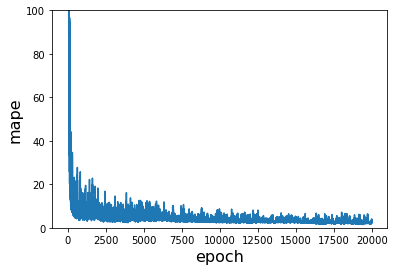

In [19]:
plt.plot(BestModel_temp.history['mape'])

plt.ylabel("mape", fontsize='16')
plt.xlabel("epoch", fontsize='16')
plt.ylim(0,100)

In [20]:
(model.predict(TrainData)-0.5)*dist_value+min_value

array([[2.2222183],
       [2.4725156],
       [2.2582946],
       [2.3853958],
       [2.1130543],
       [2.1154745],
       [2.4536772],
       [2.2166214],
       [2.2148244],
       [2.4048846],
       [2.1882553],
       [2.2207046],
       [2.2848017],
       [2.3752372],
       [2.486032 ],
       [2.120293 ],
       [2.1777027],
       [2.277195 ],
       [2.4949439],
       [2.3126087],
       [2.4095294],
       [2.183976 ],
       [2.3747652],
       [2.1844308],
       [2.4403021],
       [2.4708846],
       [2.375846 ],
       [2.1632774],
       [2.394641 ],
       [2.282627 ],
       [2.2377982],
       [2.3209248],
       [2.4096947],
       [2.1127958],
       [2.4418914],
       [2.4904864],
       [2.303854 ],
       [2.4658432],
       [2.3854969],
       [2.3648396],
       [2.053207 ],
       [2.4541674],
       [2.2422948],
       [2.616608 ],
       [2.3301508],
       [2.2973995],
       [2.5033982],
       [2.0313783],
       [2.3846443],
       [2.2055562],


In [21]:
type(TrainLabel_)

numpy.ndarray

In [22]:
TrainLabel_

array([2.21924502, 2.46368957, 2.26215303, 2.37111163, 2.20914948,
       2.10952115, 2.42213762, 2.22006744, 2.22360205, 2.37099171,
       2.18713271, 2.18813717, 2.27779392, 2.36242789, 2.47568151,
       2.11714995, 2.16910309, 2.27769231, 2.48529354, 2.30654895,
       2.3848091 , 2.17466443, 2.34718702, 2.17594146, 2.43566799,
       2.44489506, 2.3714599 , 2.16259069, 2.37944048, 2.26087934,
       2.23039413, 2.30002454, 2.39363122, 2.1043129 , 2.4253437 ,
       2.48784726, 2.28165829, 2.46536848, 2.36592946, 2.34605795,
       2.18559438, 2.45550117, 2.21198332, 2.60022166, 2.31030357,
       2.27236548, 2.4953976 , 1.95067478, 2.37754718, 2.19359308,
       2.26856977, 2.50118136, 2.07117706, 2.62309194, 2.27319842,
       2.29296771, 2.59459755, 2.51501265, 2.57309889, 2.06314742,
       2.40292147, 2.42073134, 2.40607584, 2.42866712, 2.29486513,
       2.13406253, 2.35454652, 2.38408748, 2.17708934, 2.10701787,
       2.30905014, 2.35412523, 2.41835338, 2.61159717, 2.12895

In [23]:
TrainLabel_[99]

2.4098803060000002

In [24]:
ErrorTable = np.zeros((TrainLabel.shape[0],4))
ErrorTable[:,0] = TrainLabel_
for i in range(TrainLabel.shape[0]):
    a = ((model.predict(TrainData)-0.5)*dist_value+min_value)[i]
    ErrorTable[i,1] = a
    ErrorTable[i,2] = ((TrainLabel_[i]-a)/TrainLabel_[i])*100
    ErrorTable[i,3] = np.abs(((TrainLabel_[i]-a)/TrainLabel_[i])*100)

In [25]:
ErrorTable = pd.DataFrame(ErrorTable)
ErrorTable

,0,1,2,3
0,2.219245,2.222218,-0.133979,0.133979
1,2.463690,2.472516,-0.358244,0.358244
2,2.262153,2.258295,0.170571,0.170571
3,2.371112,2.385396,-0.602423,0.602423
4,2.209149,2.113054,4.349868,4.349868
...,...,...,...,...
95,2.567412,2.585196,-0.692696,0.692696
96,2.577227,2.574472,0.106886,0.106886
97,2.177238,2.207474,-1.388743,1.388743
98,2.073031,2.082073,-0.436197,0.436197


In [26]:
np.mean(ErrorTable.iloc[:,3])

0.685697154738009

In [27]:
ErrorTable.to_csv('D:/testoneblow/test4/ANN_prediction5.0/ErrorTable.csv')

## K fold

In [28]:
Fold = 5
FoldDataNo = int(TrainData.shape[0]/Fold)
FoldDataNo

20

In [29]:
TrainData.shape

(100, 50)

In [30]:
TrainLabel

,0
0,0.899410
1,1.262941
2,0.963222
3,1.125262
4,0.884396
...,...
95,1.417194
96,1.431790
97,0.836938
98,0.681965


In [31]:
#Validation dataset
for i in range(Fold):
    
    temp_Valid_Data   = TrainData.iloc[FoldDataNo*i:FoldDataNo*(i+1) ,:]
    s1 = 'ValidData_Fold%d = temp_Valid_Data'%(i+1)
    exec(s1)
    
    temp_Valid_Label  = TrainLabel.iloc[FoldDataNo*i:FoldDataNo*(i+1) ,:]
    s2 = 'ValidLabel_Fold%d = temp_Valid_Label'%(i+1)
    exec(s2)

ValidData_Fold1

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,88.200005,88.200005,88.200005,88.200005,88.200005,88.200005,88.200005,88.200005,88.200005,88.200005,...,104.462395,104.939903,105.125694,97.604912,90.084068,82.563255,80.159050,80.099388,80.039696,79.999992
1,109.399986,109.399986,109.399986,109.399986,109.399986,109.399986,109.399986,109.399986,109.399986,109.399986,...,91.535271,87.595787,83.765160,82.810142,81.855125,80.900108,80.477196,80.298119,80.119072,79.999992
2,105.800011,105.800011,105.800011,105.800011,105.800011,105.800011,105.800011,105.800011,105.800011,105.800011,...,106.223320,99.896294,93.660667,89.840569,86.020470,82.200401,80.795342,80.496880,80.198448,79.999992
3,106.599998,106.599998,106.599998,106.599998,106.599998,106.599998,106.599998,106.599998,106.599998,106.599998,...,95.845482,101.933769,107.512627,99.633690,91.754753,83.875816,81.113457,80.695641,80.277824,79.999992
4,89.399986,89.399986,89.399986,89.399986,89.399986,89.399986,89.399986,89.399986,89.399986,89.399986,...,98.526543,91.841362,85.360832,84.286400,83.211998,82.137596,81.431602,80.894402,80.357201,79.999992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,95.399986,95.399986,95.399986,95.399986,95.399986,95.399986,95.399986,95.399986,95.399986,95.399986,...,92.423912,97.199028,101.630180,96.974449,92.318718,87.662987,84.931084,83.080711,81.230370,79.999992
16,91.399986,91.399986,91.399986,91.399986,91.399986,91.399986,91.399986,91.399986,91.399986,91.399986,...,107.927116,112.344109,116.273430,107.320122,98.366753,89.413414,85.249199,83.279472,81.309746,79.999992
17,100.999992,100.999992,100.999992,100.999992,100.999992,100.999992,100.999992,100.999992,100.999992,100.999992,...,106.967339,99.446526,92.143394,90.591484,89.039574,87.487663,85.567345,83.478233,81.389122,79.999992
18,111.399986,111.399986,111.399986,111.399986,111.399986,111.399986,111.399986,111.399986,111.399986,111.399986,...,98.234978,109.217766,119.447289,109.777733,100.108086,90.438500,85.885490,83.676994,81.468498,79.999992


In [32]:
#Training Dataset
for i in range(Fold):
    temp_Train_Data_Front = TrainData.iloc[:FoldDataNo*i,:]
    temp_Train_Data_Back  = TrainData.iloc[FoldDataNo*(i+1):,:]
    temp_Train_Data_Total = np.concatenate([temp_Train_Data_Front , temp_Train_Data_Back] , axis=0)
    s1 ='TrainData_Fold%d  = temp_Train_Data_Total'%(i+1)
    exec(s1)

    temp_Train_Label_Front = TrainLabel.iloc[:FoldDataNo*i,:]
    temp_Train_Label_Back  = TrainLabel.iloc[FoldDataNo*(i+1):,:]
    temp_Train_Label_Total = np.concatenate([temp_Train_Label_Front , temp_Train_Label_Back] , axis=0)
    s2 ='TrainLabel_Fold%d  = temp_Train_Label_Total'%(i+1)
    exec(s2)
    
TrainData_Fold1.shape , TrainLabel_Fold1.shape

((80, 50), (80, 1))

In [33]:
Model = ['thickness']

# 고정 하이퍼파라미터 : 입력/출력층 뉴런 수, 학습 Epoch 수
noOfNeuron_in  = 50
noOfNeuron_out = 1

In [34]:
for F in range(Fold):
    s1 = 'TrainData  = TrainData_Fold%d'%(F+1)
    exec(s1)
    s2 = 'TrainLabel = TrainLabel_Fold%d'%(F+1)
    exec(s2)
    
    for M in range(1):

        Tr_result_temp = pd.read_csv('D:/testoneblow/test4/ANN_prediction5.0/Tr_result_epoch5000.csv')
        learningRate   = Tr_result_temp.sort_values(['MAE'],ascending=True).iloc[0,1]
        noOfNeuron1    = np.int(Tr_result_temp.sort_values(['MAE'],ascending=True).iloc[0,2])
        noOfNeuron2    = np.int(Tr_result_temp.sort_values(['MAE'],ascending=True).iloc[0,3])
        Epoch          = 20000

        print('\n\n\nPrediction :' + Model[M])
        print('Learning rate : {:.3}'.format(learningRate))
        print('Hidden 1 neuron : %d'%(noOfNeuron1))
        print('Hidden 2 neuron : %d'%(noOfNeuron2))

    #     exec('Label_Trn = TrainLabel_%d'%(M+1))

        ################ 신경망 구조 재설계 ################

        tf.keras.backend.clear_session()
        def ANN_model(input_data):
            model = keras.Sequential()
            model.add(keras.layers.Dense(units = noOfNeuron_in,
                                         input_shape = (input_data.shape[1],), activation = 'relu'))  # Input  Layer
            model.add(keras.layers.Dense(units = noOfNeuron1,                  activation = 'relu'))  # Hidden Layer 1
            model.add(keras.layers.Dense(units = noOfNeuron2,                  activation = 'relu'))  # Hidden Layer 2
            model.add(keras.layers.Dense(units = noOfNeuron_out,               )) # Output Layer
            model.compile(optimizer= keras.optimizers.Adam(learning_rate = learningRate),
                          loss=keras.losses.mean_absolute_error,
                          metrics=['mse','mae','mape'])
            return model
        model = ANN_model(TrainData)

        ################ 신경망 학습 ################

        BestModel_temp = model.fit(TrainData, TrainLabel, epochs=Epoch, verbose=0, callbacks=[AccuracyPerEpoch()], batch_size=100)
        print("\n[Final Epochs]    RMSE:{:.5f},   MAE: {:.5f},  MAPE: {:.2f}%"
              .format(np.sqrt(BestModel_temp.history['mse'][-1]), BestModel_temp.history['mae'][-1], BestModel_temp.history['mape'][-1]))

        # 모델 저장
        model.save('D:/testoneblow/test4/ANN_prediction5.0/k-fold/BestModel_M%d_Fold%d.h5'%(M+1,F+1))

        # 히스토리 저장
        RMSE  = np.sqrt(np.array(BestModel_temp.history['mse'])[:, np.newaxis])
        MAE   = np.array(BestModel_temp.history['mae'])[:, np.newaxis]
        MAPE  = np.array(BestModel_temp.history['mape'])[:, np.newaxis]

        History_temp = pd.DataFrame(np.concatenate([RMSE,MAE,MAPE],axis=1))
        History_temp.to_csv("D:/testoneblow/test4/ANN_prediction5.0/k-fold/BestModel_M%d_Fold%d_history.csv"%(M+1,F+1), index=None)




Prediction :thickness
Learning rate : 0.005
Hidden 1 neuron : 70
Hidden 2 neuron : 30
[0 Epochs]    RMSE:99.15106,   MAE: 98.87794,  MAPE: 9812.74%
[100 Epochs]    RMSE:0.31144,   MAE: 0.27852,  MAPE: 26.76%
[200 Epochs]    RMSE:0.11233,   MAE: 0.09659,  MAPE: 10.15%
[300 Epochs]    RMSE:0.14057,   MAE: 0.12748,  MAPE: 12.49%
[400 Epochs]    RMSE:0.11676,   MAE: 0.10005,  MAPE: 9.62%
[500 Epochs]    RMSE:0.20173,   MAE: 0.19225,  MAPE: 19.63%
[600 Epochs]    RMSE:0.15530,   MAE: 0.12576,  MAPE: 13.65%
[700 Epochs]    RMSE:0.08764,   MAE: 0.07709,  MAPE: 7.93%
[800 Epochs]    RMSE:0.04573,   MAE: 0.03365,  MAPE: 3.50%
[900 Epochs]    RMSE:0.08700,   MAE: 0.06975,  MAPE: 7.90%
[1000 Epochs]    RMSE:0.18179,   MAE: 0.14892,  MAPE: 15.90%
[1100 Epochs]    RMSE:0.08634,   MAE: 0.06771,  MAPE: 6.72%
[1200 Epochs]    RMSE:0.07682,   MAE: 0.06542,  MAPE: 6.26%
[1300 Epochs]    RMSE:0.08711,   MAE: 0.06715,  MAPE: 6.74%
[1400 Epochs]    RMSE:0.05406,   MAE: 0.03904,  MAPE: 4.15%
[1500 Epochs

[13500 Epochs]    RMSE:0.01708,   MAE: 0.01411,  MAPE: 1.40%
[13600 Epochs]    RMSE:0.02295,   MAE: 0.01965,  MAPE: 1.94%
[13700 Epochs]    RMSE:0.02378,   MAE: 0.01892,  MAPE: 1.93%
[13800 Epochs]    RMSE:0.03478,   MAE: 0.02726,  MAPE: 2.71%
[13900 Epochs]    RMSE:0.02066,   MAE: 0.01347,  MAPE: 1.35%
[14000 Epochs]    RMSE:0.01644,   MAE: 0.01319,  MAPE: 1.33%
[14100 Epochs]    RMSE:0.02689,   MAE: 0.02020,  MAPE: 1.94%
[14200 Epochs]    RMSE:0.01259,   MAE: 0.00987,  MAPE: 0.94%
[14300 Epochs]    RMSE:0.02432,   MAE: 0.02067,  MAPE: 2.08%
[14400 Epochs]    RMSE:0.01147,   MAE: 0.00903,  MAPE: 0.88%
[14500 Epochs]    RMSE:0.03846,   MAE: 0.02801,  MAPE: 3.12%
[14600 Epochs]    RMSE:0.01685,   MAE: 0.01361,  MAPE: 1.32%
[14700 Epochs]    RMSE:0.03088,   MAE: 0.02698,  MAPE: 2.55%
[14800 Epochs]    RMSE:0.03171,   MAE: 0.02680,  MAPE: 2.58%
[14900 Epochs]    RMSE:0.02930,   MAE: 0.02466,  MAPE: 2.42%
[15000 Epochs]    RMSE:0.01215,   MAE: 0.00986,  MAPE: 1.00%
[15100 Epochs]    RMSE:0

[6900 Epochs]    RMSE:0.06868,   MAE: 0.04642,  MAPE: 4.80%
[7000 Epochs]    RMSE:0.05956,   MAE: 0.03058,  MAPE: 3.37%
[7100 Epochs]    RMSE:0.06782,   MAE: 0.04211,  MAPE: 4.51%
[7200 Epochs]    RMSE:0.06921,   MAE: 0.04577,  MAPE: 4.86%
[7300 Epochs]    RMSE:0.08979,   MAE: 0.05982,  MAPE: 6.93%
[7400 Epochs]    RMSE:0.06097,   MAE: 0.03765,  MAPE: 4.09%
[7500 Epochs]    RMSE:0.06342,   MAE: 0.03944,  MAPE: 4.19%
[7600 Epochs]    RMSE:0.07165,   MAE: 0.04993,  MAPE: 5.07%
[7700 Epochs]    RMSE:0.05710,   MAE: 0.02849,  MAPE: 3.12%
[7800 Epochs]    RMSE:0.06414,   MAE: 0.03474,  MAPE: 3.81%
[7900 Epochs]    RMSE:0.07292,   MAE: 0.04467,  MAPE: 5.03%
[8000 Epochs]    RMSE:0.08958,   MAE: 0.06268,  MAPE: 7.17%
[8100 Epochs]    RMSE:0.06492,   MAE: 0.04207,  MAPE: 4.31%
[8200 Epochs]    RMSE:0.05587,   MAE: 0.02465,  MAPE: 2.84%
[8300 Epochs]    RMSE:0.06143,   MAE: 0.03506,  MAPE: 3.66%
[8400 Epochs]    RMSE:0.06360,   MAE: 0.03684,  MAPE: 4.15%
[8500 Epochs]    RMSE:0.06246,   MAE: 0.

[200 Epochs]    RMSE:0.14651,   MAE: 0.11369,  MAPE: 10.97%
[300 Epochs]    RMSE:0.12537,   MAE: 0.10007,  MAPE: 10.66%
[400 Epochs]    RMSE:0.20459,   MAE: 0.17959,  MAPE: 18.54%
[500 Epochs]    RMSE:0.12441,   MAE: 0.10610,  MAPE: 10.74%
[600 Epochs]    RMSE:0.09203,   MAE: 0.07949,  MAPE: 7.96%
[700 Epochs]    RMSE:0.04429,   MAE: 0.03308,  MAPE: 3.46%
[800 Epochs]    RMSE:0.10284,   MAE: 0.09665,  MAPE: 9.48%
[900 Epochs]    RMSE:0.07374,   MAE: 0.06265,  MAPE: 6.12%
[1000 Epochs]    RMSE:0.03767,   MAE: 0.02998,  MAPE: 3.05%
[1100 Epochs]    RMSE:0.08153,   MAE: 0.06935,  MAPE: 7.13%
[1200 Epochs]    RMSE:0.05004,   MAE: 0.04003,  MAPE: 4.10%
[1300 Epochs]    RMSE:0.06056,   MAE: 0.05130,  MAPE: 4.93%
[1400 Epochs]    RMSE:0.04782,   MAE: 0.03739,  MAPE: 3.73%
[1500 Epochs]    RMSE:0.13011,   MAE: 0.11990,  MAPE: 12.14%
[1600 Epochs]    RMSE:0.03855,   MAE: 0.03076,  MAPE: 3.13%
[1700 Epochs]    RMSE:0.06391,   MAE: 0.05321,  MAPE: 5.29%
[1800 Epochs]    RMSE:0.05179,   MAE: 0.043

[13900 Epochs]    RMSE:0.02016,   MAE: 0.01745,  MAPE: 1.67%
[14000 Epochs]    RMSE:0.02308,   MAE: 0.01931,  MAPE: 1.81%
[14100 Epochs]    RMSE:0.01532,   MAE: 0.01272,  MAPE: 1.22%
[14200 Epochs]    RMSE:0.01573,   MAE: 0.01313,  MAPE: 1.27%
[14300 Epochs]    RMSE:0.01944,   MAE: 0.01673,  MAPE: 1.57%
[14400 Epochs]    RMSE:0.03063,   MAE: 0.02069,  MAPE: 2.27%
[14500 Epochs]    RMSE:0.02245,   MAE: 0.01878,  MAPE: 1.88%
[14600 Epochs]    RMSE:0.01870,   MAE: 0.01634,  MAPE: 1.57%
[14700 Epochs]    RMSE:0.02231,   MAE: 0.01800,  MAPE: 1.84%
[14800 Epochs]    RMSE:0.01738,   MAE: 0.01434,  MAPE: 1.38%
[14900 Epochs]    RMSE:0.01776,   MAE: 0.01565,  MAPE: 1.48%
[15000 Epochs]    RMSE:0.03852,   MAE: 0.03147,  MAPE: 3.19%
[15100 Epochs]    RMSE:0.03032,   MAE: 0.02481,  MAPE: 2.54%
[15200 Epochs]    RMSE:0.02843,   MAE: 0.02358,  MAPE: 2.22%
[15300 Epochs]    RMSE:0.01031,   MAE: 0.00774,  MAPE: 0.72%
[15400 Epochs]    RMSE:0.01033,   MAE: 0.00859,  MAPE: 0.84%
[15500 Epochs]    RMSE:0

[7300 Epochs]    RMSE:0.05884,   MAE: 0.04259,  MAPE: 4.11%
[7400 Epochs]    RMSE:0.06564,   MAE: 0.05183,  MAPE: 5.00%
[7500 Epochs]    RMSE:0.04875,   MAE: 0.03692,  MAPE: 3.82%
[7600 Epochs]    RMSE:0.03692,   MAE: 0.02423,  MAPE: 2.35%
[7700 Epochs]    RMSE:0.03779,   MAE: 0.02980,  MAPE: 2.76%
[7800 Epochs]    RMSE:0.01674,   MAE: 0.01128,  MAPE: 1.18%
[7900 Epochs]    RMSE:0.02167,   MAE: 0.01372,  MAPE: 1.42%
[8000 Epochs]    RMSE:0.02356,   MAE: 0.01822,  MAPE: 1.79%
[8100 Epochs]    RMSE:0.03438,   MAE: 0.02888,  MAPE: 2.74%
[8200 Epochs]    RMSE:0.03861,   MAE: 0.03249,  MAPE: 3.01%
[8300 Epochs]    RMSE:0.03880,   MAE: 0.03421,  MAPE: 3.42%
[8400 Epochs]    RMSE:0.01957,   MAE: 0.01563,  MAPE: 1.48%
[8500 Epochs]    RMSE:0.02483,   MAE: 0.01899,  MAPE: 1.95%
[8600 Epochs]    RMSE:0.01199,   MAE: 0.00982,  MAPE: 1.00%
[8700 Epochs]    RMSE:0.02937,   MAE: 0.02613,  MAPE: 2.73%
[8800 Epochs]    RMSE:0.04532,   MAE: 0.03059,  MAPE: 3.17%
[8900 Epochs]    RMSE:0.01731,   MAE: 0.

[600 Epochs]    RMSE:0.09483,   MAE: 0.07441,  MAPE: 7.52%
[700 Epochs]    RMSE:0.07879,   MAE: 0.06727,  MAPE: 7.16%
[800 Epochs]    RMSE:0.04564,   MAE: 0.03603,  MAPE: 3.73%
[900 Epochs]    RMSE:0.04874,   MAE: 0.03847,  MAPE: 3.93%
[1000 Epochs]    RMSE:0.11765,   MAE: 0.10810,  MAPE: 10.66%
[1100 Epochs]    RMSE:0.08184,   MAE: 0.06581,  MAPE: 6.25%
[1200 Epochs]    RMSE:0.06970,   MAE: 0.06104,  MAPE: 5.96%
[1300 Epochs]    RMSE:0.04025,   MAE: 0.03213,  MAPE: 3.37%
[1400 Epochs]    RMSE:0.03412,   MAE: 0.02312,  MAPE: 2.60%
[1500 Epochs]    RMSE:0.03593,   MAE: 0.02658,  MAPE: 2.87%
[1600 Epochs]    RMSE:0.03515,   MAE: 0.02367,  MAPE: 2.71%
[1700 Epochs]    RMSE:0.04189,   MAE: 0.03157,  MAPE: 3.31%
[1800 Epochs]    RMSE:0.06432,   MAE: 0.05352,  MAPE: 5.70%
[1900 Epochs]    RMSE:0.06558,   MAE: 0.05867,  MAPE: 6.00%
[2000 Epochs]    RMSE:0.02934,   MAE: 0.01914,  MAPE: 2.18%
[2100 Epochs]    RMSE:0.05107,   MAE: 0.04361,  MAPE: 4.44%
[2200 Epochs]    RMSE:0.06497,   MAE: 0.058

[14200 Epochs]    RMSE:0.01650,   MAE: 0.01227,  MAPE: 1.10%
[14300 Epochs]    RMSE:0.01618,   MAE: 0.01351,  MAPE: 1.34%
[14400 Epochs]    RMSE:0.01463,   MAE: 0.01136,  MAPE: 1.14%
[14500 Epochs]    RMSE:0.02670,   MAE: 0.02226,  MAPE: 1.99%
[14600 Epochs]    RMSE:0.01410,   MAE: 0.01123,  MAPE: 1.09%
[14700 Epochs]    RMSE:0.01896,   MAE: 0.01654,  MAPE: 1.62%
[14800 Epochs]    RMSE:0.01331,   MAE: 0.01035,  MAPE: 1.01%
[14900 Epochs]    RMSE:0.01541,   MAE: 0.01171,  MAPE: 1.06%
[15000 Epochs]    RMSE:0.02393,   MAE: 0.01933,  MAPE: 1.77%
[15100 Epochs]    RMSE:0.01964,   MAE: 0.01665,  MAPE: 1.58%
[15200 Epochs]    RMSE:0.01311,   MAE: 0.01119,  MAPE: 1.14%
[15300 Epochs]    RMSE:0.02818,   MAE: 0.01886,  MAPE: 1.82%
[15400 Epochs]    RMSE:0.02534,   MAE: 0.02122,  MAPE: 2.06%
[15500 Epochs]    RMSE:0.01018,   MAE: 0.00818,  MAPE: 0.80%
[15600 Epochs]    RMSE:0.01385,   MAE: 0.01070,  MAPE: 1.08%
[15700 Epochs]    RMSE:0.03123,   MAE: 0.02631,  MAPE: 2.44%
[15800 Epochs]    RMSE:0

In [35]:
for F in range(Fold):
    s = "Model_Fold%d = keras.models.load_model('D:/testoneblow/test4/ANN_prediction5.0/k-fold/BestModel_M1_Fold%d.h5')"%(F+1,F+1)
    exec(s)
    

In [36]:
for F in range (Fold):
    s1 = "real = ((ValidLabel_Fold%d)-0.5)*dist_value+min_value"%(F+1)
    exec(s1)
    s2 = "predict = (Model_Fold%d.predict(ValidData_Fold%d)-0.5)*dist_value+min_value"%(F+1,F+1)
    exec(s2)
    s3 = 'Result_Fold%d =  pd.DataFrame(np.concatenate((real,predict), axis = 1))'%(F+1)
    exec(s3)

In [37]:
Error = pd.DataFrame(((Result_Fold1.iloc[:,0]-Result_Fold1.iloc[:,1])/Result_Fold1.iloc[:,0])*100)
absError = np.abs(Error)
Result1 = pd.DataFrame(np.concatenate((Result_Fold1,Error,absError),axis = 1))
Result1

,0,1,2,3
0,2.219245,2.181742,1.689891,1.689891
1,2.463690,2.454339,0.379553,0.379553
2,2.262153,2.252295,0.435801,0.435801
3,2.371112,2.364076,0.296707,0.296707
4,2.209149,2.129722,3.595371,3.595371
...,...,...,...,...
15,2.117150,2.107392,0.460886,0.460886
16,2.169103,2.114248,2.528939,2.528939
17,2.277692,2.259513,0.798130,0.798130
18,2.485294,2.468543,0.674003,0.674003


In [38]:
for F in range (Fold):
    exec("MAE = pd.DataFrame(np.abs(Result_Fold%d.iloc[:,0]-Result_Fold%d.iloc[:,1]))"%(F+1,F+1))
    s1 = 'Error = pd.DataFrame(((Result_Fold%d.iloc[:,0]-Result_Fold%d.iloc[:,1])/Result_Fold%d.iloc[:,0])*100)'%(F+1,F+1,F+1)
    exec(s1)
    s2 = 'Result%d = pd.DataFrame(np.concatenate((Result_Fold%d,Error,np.abs(Error),MAE),axis = 1))'%(F+1,F+1)
    exec(s2)
    s3 = "Result%d.to_csv('D:/testoneblow/test4/ANN_prediction5.0/k-fold/Result%d.csv')"%(F+1,F+1)
    exec(s3)

In [39]:
Result1

,0,1,2,3,4
0,2.219245,2.181742,1.689891,1.689891,0.037503
1,2.463690,2.454339,0.379553,0.379553,0.009351
2,2.262153,2.252295,0.435801,0.435801,0.009858
3,2.371112,2.364076,0.296707,0.296707,0.007035
4,2.209149,2.129722,3.595371,3.595371,0.079427
...,...,...,...,...,...
15,2.117150,2.107392,0.460886,0.460886,0.009758
16,2.169103,2.114248,2.528939,2.528939,0.054855
17,2.277692,2.259513,0.798130,0.798130,0.018179
18,2.485294,2.468543,0.674003,0.674003,0.016751


In [40]:
average_Error_Fold = []
Max_Error_Fold = []
for F in range(Fold):
    exec("a = np.mean(Result%d.iloc[:,3])"%(F+1))
    average_Error_Fold = np.append(average_Error_Fold,a)
    exec("b = np.max(Result%d.iloc[:,3])"%(F+1))
    Max_Error_Fold = np.append(Max_Error_Fold,b)

In [41]:
average_Error_Fold

array([0.95616639, 0.94369946, 1.56227235, 0.69202377, 2.36177005])

In [42]:
average_Error = np.mean(average_Error_Fold)
average_Error

1.3031864035450993

In [43]:
Max_Error_Fold

array([ 3.59537103,  2.20760422,  9.84705584,  3.23944983, 11.81124413])